# Tutorial on Safe DeepRL by Daniel and Wei

This tutorial shows how you can train modern reinforcement learning algorithms with safety constraints given by a shield. The tutorial is diveded in 5 Exercises: 
- (1) Very ligthly delve into a continuous deep reinforcement learning policy optimization algorithm: Deep Deterministic Policy Gradient (DDPG). Understand and chose parameters for accordingly.
- (2) Make it work on a classical toy example "Pendulum-v0" and obtain a good policy.
- (3) Work with a harder environment "LunarLanding" and obtain a good policy.
- (4) Work with a, yet harder environment, "SafeLunarLanding" a harder version of "LunarLanding" modified in such a way that the ship explodes if certain forces are exerted in the engines. Testing the previous model and verifying extreme negative rewards throughout learning.
- (5) Designing a shield class, which shields the agent from exploding the ship, yielding reasonable rewards throughout learning.

### Exercise (1) Deep Deterministic Policy Gradient
Deep Deterministic Policy Gradient (DDPG) is an algorithm which concurrently learns a Q-function and a policy. It uses off-policy data and the Bellman equation to learn the Q-function, and uses the Q-function to learn the policy.
It is, therefore, an actor-critic method, the actor is the policy and the critic the Q-function. Look at the get_actor() and get_critic() methods, fill the parameters for the layers, and more specifically for the outputs of the functions. Make sure they make sense.

Look for blocks #change here to alter and insert your solution.

In [1]:
import gym
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

from exploration import OUActionNoise
from rpm import Buffer, update_target

class DDPG:
    def __init__(self,
                 problem_name,
                 num_states,
                 num_actions,
                 lower_bound,
                 upper_bound,
                 total_episodes=100):

        self.problem_name = problem_name
        self.num_states = num_states
        self.num_actions = num_actions
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound

        self.std_dev = 0.2
        self.ou_noise = OUActionNoise(mean=np.zeros(1),
                                      std_deviation=float(self.std_dev) *
                                      np.ones(1))

        self.actor_model = self.get_actor()
        self.critic_model = self.get_critic()

        self.target_actor = self.get_actor()
        self.target_critic = self.get_critic()

        # Making the weights equal initially
        self.target_actor.set_weights(self.actor_model.get_weights())
        self.target_critic.set_weights(self.critic_model.get_weights())

        # Learning rate for actor-critic models
        self.critic_lr = 0.002
        self.actor_lr = 0.001

        self.critic_optimizer = tf.keras.optimizers.Adam(self.critic_lr)
        self.actor_optimizer = tf.keras.optimizers.Adam(self.actor_lr)

        self.total_episodes = total_episodes
        # Discount factor for future rewards
        self.gamma = 0.99
        # Used to update target networks
        self.tau = 0.005

        self.buffer = Buffer(50000,
                             64,
                             gamma=self.gamma,
                             num_states=self.num_states,
                             num_actions=self.num_actions)
# change here
    def get_actor(self):
        # Initialize weights between -3e-3 and 3-e3
        last_init = tf.random_uniform_initializer(minval=-0.003, maxval=0.003)

        inputs = layers.Input(shape=(self.num_states, ))
        out = layers.Dense(256, activation="relu")(inputs)
        out = layers.Dense(256, activation="relu")(out)
        outputs = layers.Dense(self.num_actions,
                               activation="tanh",
                               kernel_initializer=last_init)(out)

        # Our upper bound is 2.0 for Pendulum.
        outputs = outputs * self.upper_bound
        model = tf.keras.Model(inputs, outputs)
        return model
# change here


# change here
    def get_critic(self):
        # State as input
        state_input = layers.Input(shape=(self.num_states))
        state_out = layers.Dense(16, activation="relu")(state_input)
        state_out = layers.Dense(32, activation="relu")(state_out)

        # Action as input
        action_input = layers.Input(shape=(self.num_actions))
        action_out = layers.Dense(32, activation="relu")(action_input)

        # Both are passed through seperate layer before concatenating
        concat = layers.Concatenate()([state_out, action_out])

        out = layers.Dense(256, activation="relu")(concat)
        out = layers.Dense(256, activation="relu")(out)
        outputs = layers.Dense(self.num_actions)(out)

        # Outputs single value for give state-action
        model = tf.keras.Model([state_input, action_input], outputs)

        return model
# change here

    def policy(self, state, noise_object):
        sampled_actions = tf.squeeze(self.actor_model(state))
        noise = noise_object()
        # Adding noise to action
        sampled_actions = sampled_actions.numpy() + noise

        # We make sure action is within bounds
        legal_action = np.clip(sampled_actions, self.lower_bound,
                               self.upper_bound)

        return [np.squeeze(legal_action)]

    def save_parameters(self):

        # Save the weights
        actor_model.save_weights("pendulum_actor.h5")
        critic_model.save_weights("pendulum_critic.h5")

        target_actor.save_weights("pendulum_target_actor.h5")
        target_critic.save_weights("pendulum_target_critic.h5")

    def load_parameters(self):

        # Save the weights
        actor_model.load_parameters("pendulum_actor.h5")
        critic_model.load_parameters("pendulum_critic.h5")

        target_actor.load_parameters("pendulum_target_actor.h5")
        target_critic.load_parameters("pendulum_target_critic.h5")


### Exercise (2) Pendulum-v0

The classsic Pendulum-v0 environment is often used to benchmark deep reinforcement learning algorithms. The inverted pendulum swingup problem is a classic problem in the control literature. In this version of the problem, the pendulum starts in a random position, and the goal is to swing it up so it stays upright. For more information visit https://github.com/openai/gym/wiki/Pendulum-v0

In this Exercise, you will fine tune the paramters also changed above to verify the robustness of your model. An average reward higher of -200 is desirable. You do not need to change parameters in this exercise, make sure you at least understand what the method loop_env() is doing.

In [1]:
    problem = "Pendulum-v0"
    env = gym.make(problem)

    num_states = env.observation_space.shape[0]
    print("Size of State Space ->  {}".format(num_states))
    num_actions = env.action_space.shape[0]
    print("Size of Action Space ->  {}".format(num_actions))

    upper_bound = env.action_space.high[0]
    lower_bound = env.action_space.low[0]

    print("Max Value of Action ->  {}".format(upper_bound))
    print("Min Value of Action ->  {}".format(lower_bound))


NameError: name 'gym' is not defined

In [2]:
 ddpg_agent = DDPG(problem_name=problem,
                      num_states=num_states,
                      num_actions=num_actions,
                      lower_bound=lower_bound,
                      upper_bound=upper_bound,
                      total_episodes=100)

NameError: name 'problem' is not defined

In [6]:
    def loop_env():
        import matplotlib.pyplot as plt
        %matplotlib inline
        from pyvirtualdisplay import Display
        display = Display(visible=0, size=(1400, 900))
        display.start()

        is_ipython = 'inline' in plt.get_backend()
        if is_ipython:
            from IPython import display

        plt.ion()

        # To store reward history of each episode
        ep_reward_list = []
        # To store average reward history of last few episodes
        avg_reward_list = []
        # Takes about 4 min to train
        for ep in range(ddpg_agent.total_episodes):

            prev_state = env.reset()
            episodic_reward = 0
            render_episodes = 1000
            render = not (ep % render_episodes)

            if ddpg_agent.problem_name != 'Pendulum-v0':
                img = plt.imshow(env.render(mode='rgb_array'))
            while True:
                # Uncomment this to see the Actor in action
                # But not in a python notebook.
                # env.render()
                if render and ddpg_agent.problem_name != 'Pendulum-v0': 
                    img.set_data(env.render(mode='rgb_array')) # just update the data
                    display.display(plt.gcf())
                    display.clear_output(wait=True)
                    action = env.action_space.sample()
                    env.step(action)

                tf_prev_state = tf.expand_dims(tf.convert_to_tensor(prev_state), 0)
                action = ddpg_agent.policy(tf_prev_state, ddpg_agent.ou_noise)
                # Recieve state and reward from environment.
                if ddpg_agent.num_actions>1:
                    action = action[0]
                else:
                    pass
                state, reward, done, info = env.step(action)


                ddpg_agent.buffer.record((prev_state, action, reward, state))
                episodic_reward += reward

                ddpg_agent.buffer.learn(ddpg_agent.target_actor,
                                        ddpg_agent.target_critic,
                                        ddpg_agent.actor_model,
                                        ddpg_agent.critic_model,
                                        ddpg_agent.actor_optimizer,
                                        ddpg_agent.critic_optimizer)

                update_target(ddpg_agent.target_actor.variables,
                            ddpg_agent.actor_model.variables, ddpg_agent.tau)
                update_target(ddpg_agent.target_critic.variables,
                            ddpg_agent.critic_model.variables, ddpg_agent.tau)

                # End this episode when `done` is True
                if done:
                    break

                prev_state = state

            ep_reward_list.append(episodic_reward)

            # Mean of last 40 episodes
            avg_reward = np.mean(ep_reward_list[-40:])
            print("Episode * {} * Avg Reward is ==> {}".format(ep, avg_reward))
            avg_reward_list.append(avg_reward)

        # Plotting graph
        # Episodes versus Avg. Rewards
        plt.plot(avg_reward_list)
        plt.xlabel("Episode")
        plt.ylabel("Avg. Epsiodic Reward")
        plt.show()

Episode * 0 * Avg Reward is ==> -1243.872683568953
Episode * 1 * Avg Reward is ==> -1416.3453704305657
Episode * 2 * Avg Reward is ==> -1356.5861986624127
Episode * 3 * Avg Reward is ==> -1380.9175640256617
Episode * 4 * Avg Reward is ==> -1407.804428775171
Episode * 5 * Avg Reward is ==> -1405.176811093226
Episode * 6 * Avg Reward is ==> -1335.7970494677309
Episode * 7 * Avg Reward is ==> -1326.301731619555
Episode * 8 * Avg Reward is ==> -1345.111279394796
Episode * 9 * Avg Reward is ==> -1317.4777223471385
Episode * 10 * Avg Reward is ==> -1309.829747445339
Episode * 11 * Avg Reward is ==> -1325.616911733293
Episode * 12 * Avg Reward is ==> -1340.0237582754623
Episode * 13 * Avg Reward is ==> -1356.5167039765277
Episode * 14 * Avg Reward is ==> -1365.553452414686
Episode * 15 * Avg Reward is ==> -1376.427202804311
Episode * 16 * Avg Reward is ==> -1323.565624910608
Episode * 17 * Avg Reward is ==> -1292.7301414545489
Episode * 18 * Avg Reward is ==> -1237.8835224110046
Episode * 19 

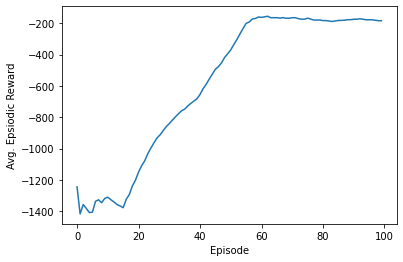

In [5]:
loop_env()

### Exercise (3) LunarLanding

The Lunar Landing exercise is far more challenging then Pendulum-0. In the LudarLander, the Landing pad is always at coordinates (0,0). Coordinates are the first two numbers in state vector. Reward for moving from the top of the screen to landing pad and zero speed is about 100..140 points. If lander moves away from landing pad it loses reward back. Episode finishes if the lander crashes or comes to rest, receiving additional -100 or +100 points. Each leg ground contact is +10. Firing main engine is -0.3 points each frame. Solved is 200 points. Landing outside landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land on its first attempt. Four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine.

For more information, visit https://github.com/openai/gym/wiki/Leaderboard#lunarlander-v2

In [4]:
    from lundar_landing import LunarLanderContinuous
    
    problem = "LunarLanderContinuous-v2"
    env = LunarLanderContinuous()

    num_states = env.observation_space.shape[0]
    print("Size of State Space ->  {}".format(num_states))
    num_actions = env.action_space.shape[0]
    print("Size of Action Space ->  {}".format(num_actions))

    upper_bound = env.action_space.high[0]
    lower_bound = env.action_space.low[0]

    print("Max Value of Action ->  {}".format(upper_bound))
    print("Min Value of Action ->  {}".format(lower_bound))

Size of State Space ->  8
Size of Action Space ->  2
Max Value of Action ->  1.0
Min Value of Action ->  -1.0


In [8]:
 ddpg_agent = DDPG(problem_name=problem,
                      num_states=num_states,
                      num_actions=num_actions,
                      lower_bound=lower_bound,
                      upper_bound=upper_bound,
                      total_episodes=100)

Episode * 50 * Avg Reward is ==> -678.7882056564983
Episode * 51 * Avg Reward is ==> -692.7057158317357
Episode * 52 * Avg Reward is ==> -694.70578410249
Episode * 53 * Avg Reward is ==> -691.3372061207698
Episode * 54 * Avg Reward is ==> -693.9196531127408
Episode * 55 * Avg Reward is ==> -704.5760755643215
Episode * 56 * Avg Reward is ==> -718.5039230994432
Episode * 57 * Avg Reward is ==> -723.8882144195167
Episode * 58 * Avg Reward is ==> -742.831014155453
Episode * 59 * Avg Reward is ==> -761.5540461489343
Episode * 60 * Avg Reward is ==> -765.951498599861
Episode * 61 * Avg Reward is ==> -767.7928652519388
Episode * 62 * Avg Reward is ==> -761.8880661371538
Episode * 63 * Avg Reward is ==> -760.0133660652934
Episode * 64 * Avg Reward is ==> -737.5460493746887
Episode * 65 * Avg Reward is ==> -739.3627267437518
Episode * 66 * Avg Reward is ==> -723.5167640304096
Episode * 67 * Avg Reward is ==> -644.9742512991234
Episode * 68 * Avg Reward is ==> -646.4028240549394
Episode * 69 * A

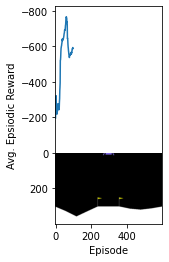

In [9]:
loop_env()

### Exercise (4) SafeLunarLanding

The SafeLunarLanding environment, is an altered version of LundarLander-v2 created for the purpose of this Tutorial. In this version, the main and lateral engines explode when put overpressure for more than 20 timesteps per episode. The spaceship is considered to be overpressured on its engines if one of the following situations is verified:

-(1) Main Engine over 0.9 capacity

-(2) Left Engine less than -0.8 capacity

-(3) Right Engine over 0.8 capacity

In [3]:
    from lundar_landing import LunarLanderContinuous
    from safe_lunar_env import SafeLunarEnv

    problem = "LunarLanderContinuous-v2"
    env = LunarLanderContinuous()
    env = SafeLunarEnv(env)

    num_states = env.observation_space.shape[0]
    print("Size of State Space ->  {}".format(num_states))
    num_actions = env.action_space.shape[0]
    print("Size of Action Space ->  {}".format(num_actions))

    upper_bound = env.action_space.high[0]
    lower_bound = env.action_space.low[0]

    print("Max Value of Action ->  {}".format(upper_bound))
    print("Min Value of Action ->  {}".format(lower_bound))

Size of State Space ->  8
Size of Action Space ->  2
Max Value of Action ->  1.0
Min Value of Action ->  -1.0


In [4]:
 ddpg_agent = DDPG(problem_name=problem,
                      num_states=num_states,
                      num_actions=num_actions,
                      lower_bound=lower_bound,
                      upper_bound=upper_bound,
                      total_episodes=100)

Episode * 0 * Avg Reward is ==> -949.7611016511013
Episode * 1 * Avg Reward is ==> -990.5384439675288
Episode * 2 * Avg Reward is ==> -1030.3523339173976
Episode * 3 * Avg Reward is ==> -1042.2972603185224
Episode * 4 * Avg Reward is ==> -1076.3450033276615
Episode * 5 * Avg Reward is ==> -1082.7060716131984
Episode * 6 * Avg Reward is ==> -1075.7964060487059
Episode * 7 * Avg Reward is ==> -1094.6612359871392
Episode * 8 * Avg Reward is ==> -1103.3520052534182
Episode * 9 * Avg Reward is ==> -1036.1970722915426
Episode * 10 * Avg Reward is ==> -967.7357976186963
Episode * 11 * Avg Reward is ==> -915.9048046999502
Episode * 12 * Avg Reward is ==> -886.3441862562024
Episode * 13 * Avg Reward is ==> -885.4289524193662
Episode * 14 * Avg Reward is ==> -877.7137367817046
Episode * 15 * Avg Reward is ==> -857.0855014801473
Episode * 16 * Avg Reward is ==> -884.7492420684172
Episode * 17 * Avg Reward is ==> -899.0905231126422
Episode * 18 * Avg Reward is ==> -910.0630408562247
Episode * 19 *

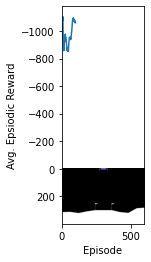

In [7]:
loop_env()

### Exercise (5) Shield for SafeLunarLanding
In this Exercise, you will implement the shield to save the spaceship from exploding! With Exercise 4 in mind, implement the needed action shield and parameters. Then test the agent and verify the yielding of much higher rewards through learning when compared with the version without the shield. Feel free change the paramters to verify its effects!

In [8]:
class Shield:
    def __init__(self,
                 thresholds_main_engine=0.9,
                 thresholds_left_engine=-.8,
                 thresholds_right_engine=.8):
        self.thresholds_main_engine = thresholds_main_engine
        self.thresholds_left_engine = thresholds_left_engine
        self.thresholds_right_engine = thresholds_right_engine

    def shield_action(self, action):

        action_main_engine = np.clip(action[0], -self.thresholds_main_engine,
                                     self.thresholds_main_engine)

        action_lateral_engines = np.clip(action[1],
                                         self.thresholds_left_engine,
                                         self.thresholds_right_engine)

        action = [action_main_engine, action_lateral_engines]
        return action

env = SafeLunarEnv(env, Shield())

num_states = env.observation_space.shape[0]
print("Size of State Space ->  {}".format(num_states))
num_actions = env.action_space.shape[0]
print("Size of Action Space ->  {}".format(num_actions))

upper_bound = env.action_space.high[0]
lower_bound = env.action_space.low[0]

print("Max Value of Action ->  {}".format(upper_bound))
print("Min Value of Action ->  {}".format(lower_bound))

Size of State Space ->  8
Size of Action Space ->  2
Max Value of Action ->  1.0
Min Value of Action ->  -1.0


In [9]:
 ddpg_agent = DDPG(problem_name=problem,
                      num_states=num_states,
                      num_actions=num_actions,
                      lower_bound=lower_bound,
                      upper_bound=upper_bound,
                      total_episodes=100)

In [10]:
loop_env()

Episode * 0 * Avg Reward is ==> -198.38091056970435
Episode * 1 * Avg Reward is ==> -423.99516407469054
Episode * 2 * Avg Reward is ==> -485.1207329467648
Episode * 3 * Avg Reward is ==> -398.6483528481967
Episode * 4 * Avg Reward is ==> -346.7951325841615
Episode * 5 * Avg Reward is ==> -309.08103392215406
Episode * 6 * Avg Reward is ==> -313.607450517463
Episode * 7 * Avg Reward is ==> -329.884982291974
Episode * 8 * Avg Reward is ==> -302.4205381501109
Episode * 9 * Avg Reward is ==> -294.60227502777656
Episode * 10 * Avg Reward is ==> -294.9314141381287
Episode * 11 * Avg Reward is ==> -282.73657368582025
Episode * 12 * Avg Reward is ==> -268.0296317028384
Episode * 13 * Avg Reward is ==> -259.7844647236692
Episode * 14 * Avg Reward is ==> -254.4576845482438
Episode * 15 * Avg Reward is ==> -243.11027991754358
Episode * 16 * Avg Reward is ==> -236.36718003373366
Episode * 17 * Avg Reward is ==> -229.5806325157653
Episode * 18 * Avg Reward is ==> -238.38444706463144
Episode * 19 * A

KeyboardInterrupt: 